<a href="https://colab.research.google.com/github/chamini123/Salon-Employee-Predict/blob/main/Salary_Increment_Predict_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving employee-salary-data.csv to employee-salary-data.csv


## Dataset details

### data describe

In [3]:
emp_data = pd.read_csv("employee-salary-data.csv")

In [4]:
emp_data.shape

(4460, 11)

In [ ]:
emp_data.head()

,hired,service_year,nvq_level,length_of_service,employee_status,monthly_leaves,average_monthly_hours,handle_appointments,customer_satisfaction_level,monthly_basic_salary,yearly_increment
0,2020,2021,3,1,1,3,184,23,1,29000,1
1,2019,2021,4,2,2,0,296,40,1,53000,1
2,2017,2019,5,2,2,0,294,30,1,42000,0
3,2019,2021,2,2,2,2,237,40,3,38000,1
4,2018,2020,3,2,2,1,242,37,1,42000,1


In [ ]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   hired                        4460 non-null   int64
 1   service_year                 4460 non-null   int64
 2   nvq_level                    4460 non-null   int64
 3   length_of_service            4460 non-null   int64
 4   employee_status              4460 non-null   int64
 5   monthly_leaves               4460 non-null   int64
 6   average_monthly_hours        4460 non-null   int64
 7   handle_appointments          4460 non-null   int64
 8   customer_satisfaction_level  4460 non-null   int64
 9   monthly_basic_salary         4460 non-null   int64
 10  yearly_increment             4460 non-null   int64
dtypes: int64(11)
memory usage: 383.4 KB


In [ ]:
emp_data.isnull().sum()

hired                          0
service_year                   0
nvq_level                      0
length_of_service              0
employee_status                0
monthly_leaves                 0
average_monthly_hours          0
handle_appointments            0
customer_satisfaction_level    0
monthly_basic_salary           0
yearly_increment               0
dtype: int64

In [5]:
emp_data.describe()

,hired,service_year,nvq_level,length_of_service,employee_status,monthly_leaves,average_monthly_hours,handle_appointments,customer_satisfaction_level,monthly_basic_salary,yearly_increment
count,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000
mean,2017.487444,2019.765022,3.507175,2.199552,1.577578,2.516592,214.100448,27.843946,1.771749,39533.183857,0.511659
std,1.685811,1.371198,1.119339,1.372723,0.494000,1.713747,32.040759,10.465949,0.788974,7952.032817,0.499920
min,2015.000000,2016.000000,2.000000,1.000000,1.000000,0.000000,160.000000,10.000000,1.000000,25000.000000,0.000000
25%,2016.000000,2019.000000,3.000000,1.000000,1.000000,1.000000,189.000000,19.000000,1.000000,35000.000000,0.000000
50%,2017.000000,2020.000000,3.000000,2.000000,2.000000,3.000000,211.000000,28.000000,2.000000,39000.000000,1.000000
75%,2019.000000,2021.000000,5.000000,3.000000,2.000000,4.000000,239.000000,37.000000,2.000000,40000.000000,1.000000
max,2020.000000,2021.000000,5.000000,6.000000,2.000000,5.000000,300.000000,45.000000,3.000000,70000.000000,1.000000


In [6]:
# Data Preprocessing

print('Variables with zero variance: ')
print(emp_data.std()[emp_data.std() == 0].index)


Variables with zero variance: 
Index([], dtype='object')


In [7]:
# Gives the categorical variables minus the target variable in our dataset
categorical_var = list(emp_data.dtypes[emp_data.dtypes == object].index)

# Creates an empty list for categorical variables with zero variation
zero_cardinality = [] 
for i in categorical_var: 
    if len(emp_data[i].value_counts().index) == 1: 
        zero_cardinality.append(i) 

print('Variables with zero cardinality: ')
print(zero_cardinality)

Variables with zero cardinality: 
[]


In [8]:
# Gives the categorical variables minus the target variable in our dataset
categorical_var = list(emp_data.dtypes[emp_data.dtypes == object].index)

# Creates a list of categorical variables with high cardinality
high_cardinality = [] 

for i in categorical_var: 
    if len(emp_data[i].value_counts().index) > 200: 
        high_cardinality.append(i) 
         
print('Variables with high cardinality: ')
print(high_cardinality)

Variables with high cardinality: 
[]


In [9]:
categorical_val = []
continous_val = []
for column in emp_data.columns:
    print("--------------------")
    print(f"{column} : {emp_data[column].unique()}")
    if len(emp_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
hired : [2020 2019 2017 2018 2015 2016]
--------------------
service_year : [2021 2019 2020 2018 2017 2016]
--------------------
nvq_level : [3 4 5 2]
--------------------
length_of_service : [1 2 5 4 3 6]
--------------------
employee_status : [1 2]
--------------------
monthly_leaves : [3 0 2 1 4 5]
--------------------
average_monthly_hours : [184 296 294 237 242 240 236 174 207 234 176 245 210 170 274 299 172 212
 190 222 241 163 180 249 165 224 199 226 178 209 204 196 233 189 160 228
 162 177 179 188 193 171 218 221 203 231 201 289 173 197 187 166 186 227
 247 230 238 208 285 192 254 248 194 287 167 246 169 275 252 243 223 182
 191 164 220 225 206 213 244 271 183 239 292 216 161 215 219 267 195 232
 259 217 293 202 264 198 235 175 200 291 290 260 185 168 265 268 270 250
 229 281 278 282 205 181 251 280 211 266 297 214 295 284 256 276 300 298
 273 263 283 269 253 277 255 258 279 286 257 261 288 262 272]
--------------------
handle_appointments : [23 40 30 37 31

In [10]:
categorical_val

['hired',
 'service_year',
 'nvq_level',
 'length_of_service',
 'employee_status',
 'monthly_leaves',
 'customer_satisfaction_level',
 'yearly_increment']

In [11]:
continous_val

['average_monthly_hours', 'handle_appointments', 'monthly_basic_salary']

## Exploration and Visualization of Data



In [ ]:
emp_data['yearly_increment'].value_counts()

1    2282
0    2178
Name: yearly_increment, dtype: int64


1 --> Salary increment recieve(yearly)

0 --> Salary increment not recieve(yearly)

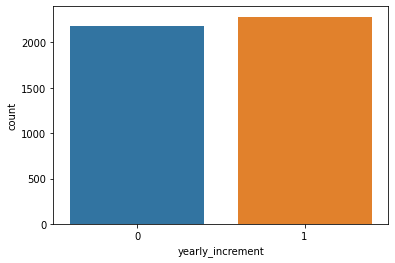

In [ ]:
sns.countplot(x='yearly_increment', data=emp_data)
plt.show()

In [ ]:
countNoIncrement = len(emp_data[emp_data.yearly_increment == 0])
countHaveIncrement = len(emp_data[emp_data.yearly_increment == 1])
print("Percentage of Employee not receive salary increment: {:.2f}%".format((countNoIncrement / (len(emp_data.yearly_increment))*100)))
print("Percentage of Employee not receive salary increment: {:.2f}%".format((countHaveIncrement / (len(emp_data.yearly_increment))*100)))

Percentage of Employee not receive salary increment: 48.83%
Percentage of Employee not receive salary increment: 51.17%


In [ ]:
emp_data.groupby('yearly_increment').mean()

,hired,service_year,nvq_level,length_of_service,employee_status,monthly_leaves,average_monthly_hours,handle_appointments,customer_satisfaction_level,monthly_basic_salary
yearly_increment,,,,,,,,,,
0,2017.796143,2019.681818,3.498623,1.763085,1.359963,3.424702,192.751148,21.018825,1.857208,36528.007346
1,2017.192813,2019.844435,3.515337,2.616126,1.785276,1.649869,234.476775,34.358019,1.690184,42401.402279


#### Statistical Description of data

In [ ]:
emp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
hired,4460.0,2017.487444,1.685811,2015.0,2016.0,2017.0,2019.0,2020.0
service_year,4460.0,2019.765022,1.371198,2016.0,2019.0,2020.0,2021.0,2021.0
nvq_level,4460.0,3.507175,1.119339,2.0,3.0,3.0,5.0,5.0
length_of_service,4460.0,2.199552,1.372723,1.0,1.0,2.0,3.0,6.0
employee_status,4460.0,1.577578,0.494000,1.0,1.0,2.0,2.0,2.0
monthly_leaves,4460.0,2.516592,1.713747,0.0,1.0,3.0,4.0,5.0
average_monthly_hours,4460.0,214.100448,32.040759,160.0,189.0,211.0,239.0,300.0
handle_appointments,4460.0,27.843946,10.465949,10.0,19.0,28.0,37.0,45.0
customer_satisfaction_level,4460.0,1.771749,0.788974,1.0,1.0,2.0,2.0,3.0
monthly_basic_salary,4460.0,39533.183857,7952.032817,25000.0,35000.0,39000.0,40000.0,70000.0


#### Correlation

In [ ]:
emp_data.corr()

,hired,service_year,nvq_level,length_of_service,employee_status,monthly_leaves,average_monthly_hours,handle_appointments,customer_satisfaction_level,monthly_basic_salary,yearly_increment
hired,1.000000,0.604990,-0.012312,-0.539871,-0.423506,-0.010563,-0.323765,-0.359091,-0.000638,-0.286641,-0.178915
service_year,0.604990,1.000000,-0.016728,0.287634,0.161006,0.012921,0.117248,0.132480,0.005761,0.072208,0.059288
nvq_level,-0.012312,-0.016728,1.000000,-0.001662,0.000210,0.008823,-0.005717,0.011046,-0.215521,0.166717,0.007465
length_of_service,-0.539871,0.287634,-0.001662,1.000000,0.747398,0.015847,0.571809,0.625488,-0.000591,0.461610,0.310662
employee_status,-0.423506,0.161006,0.000210,0.747398,1.000000,0.005632,0.777700,0.846540,-0.010947,0.623905,0.430409
monthly_leaves,-0.010563,0.012921,0.008823,0.015847,0.005632,1.000000,-0.573296,-0.165904,0.016237,-0.171270,-0.517739
average_monthly_hours,-0.323765,0.117248,-0.005717,0.571809,0.777700,-0.573296,1.000000,0.767655,-0.024705,0.599474,0.651030
handle_appointments,-0.359091,0.132480,0.011046,0.625488,0.846540,-0.165904,0.767655,1.000000,-0.016238,0.625247,0.637165
customer_satisfaction_level,-0.000638,0.005761,-0.215521,-0.000591,-0.010947,0.016237,-0.024705,-0.016238,1.000000,-0.135162,-0.105832
monthly_basic_salary,-0.286641,0.072208,0.166717,0.461610,0.623905,-0.171270,0.599474,0.625247,-0.135162,1.000000,0.369242


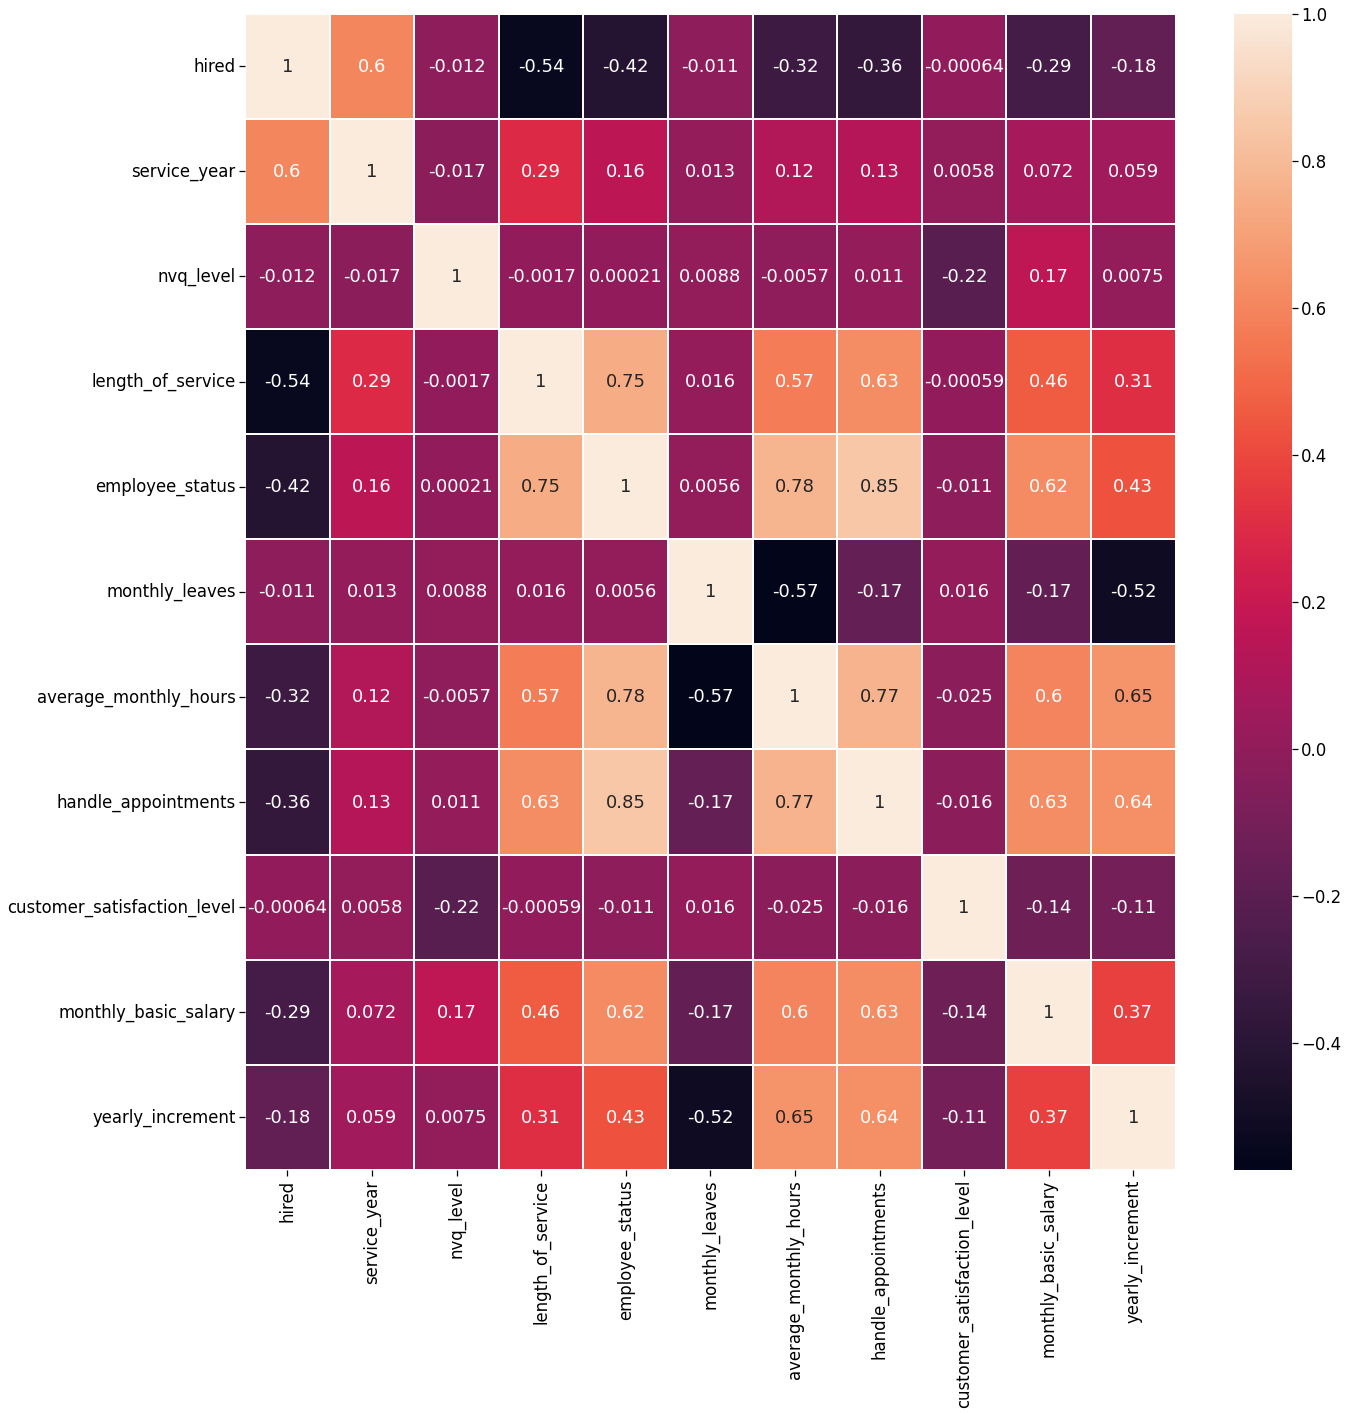

In [ ]:
plt.figure(figsize=(20,20))
sns.set_context('notebook',font_scale = 1.5)
sns.heatmap(emp_data.corr(),annot=True,linewidth =1)
plt.tight_layout()

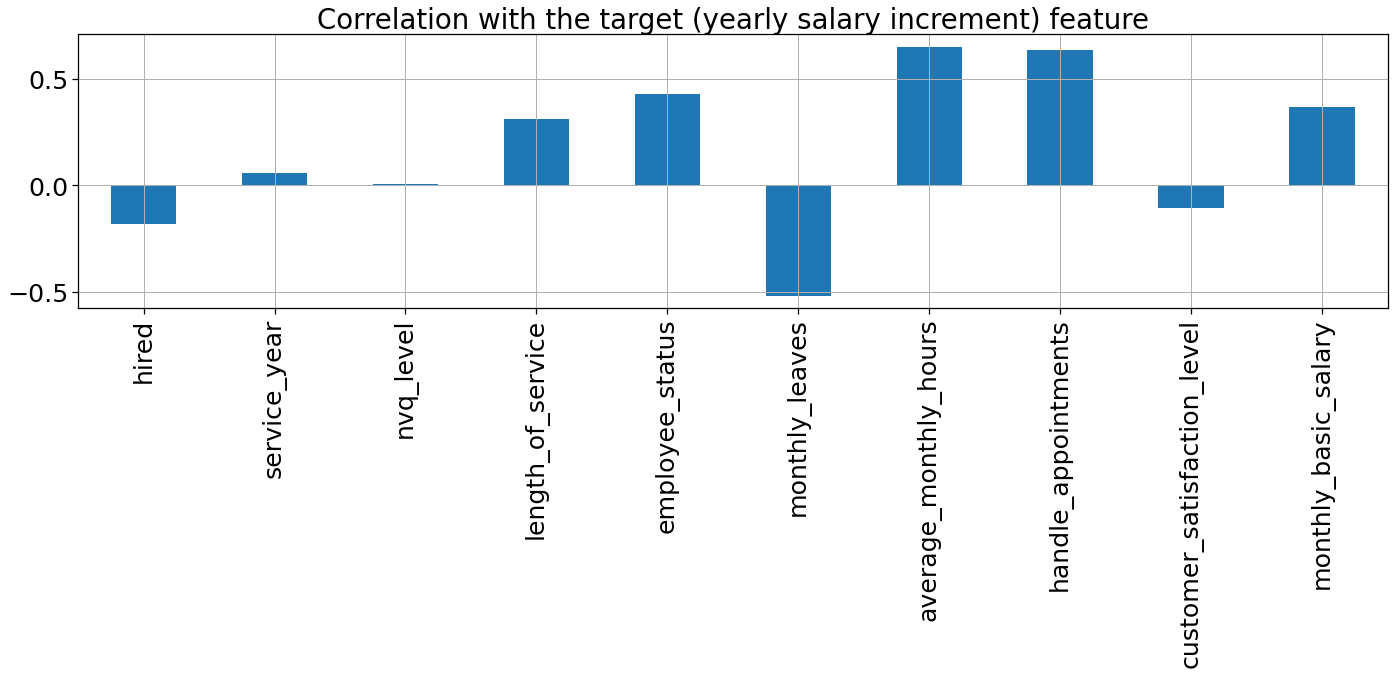

In [ ]:
sns.set_context('notebook',font_scale = 2.3)
emp_data.drop('yearly_increment', axis=1).corrwith(emp_data.yearly_increment).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target (yearly salary increment) feature")
plt.tight_layout()


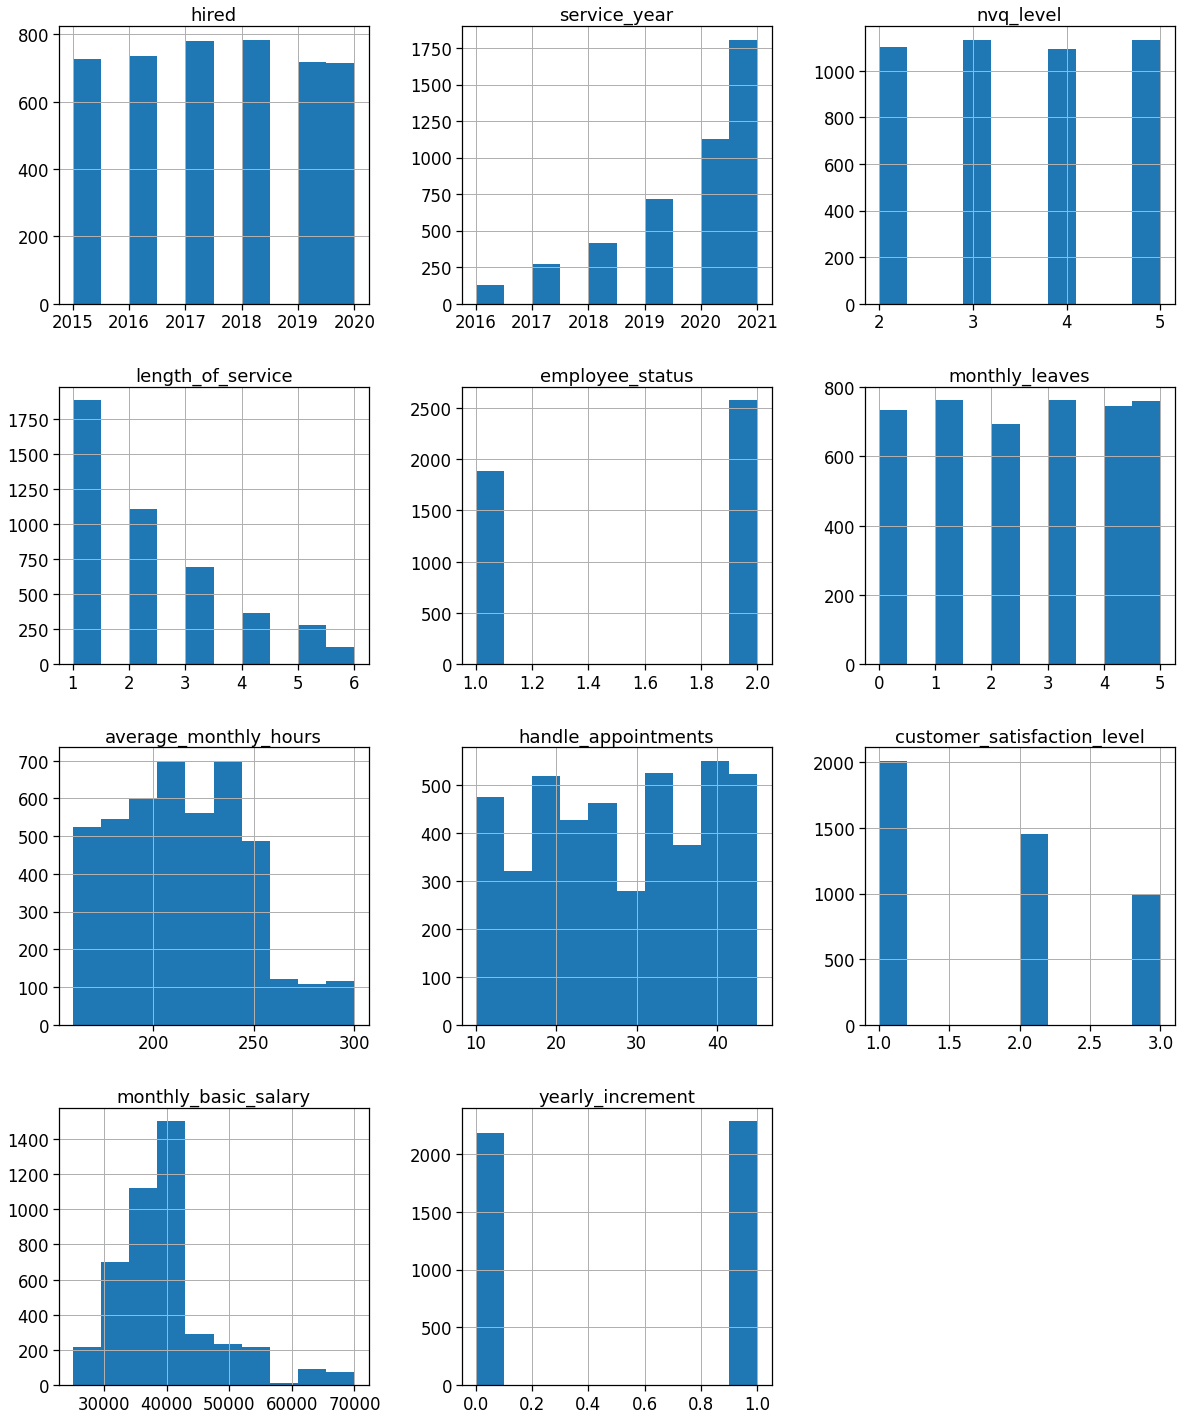

In [ ]:
num_bins = 10
emp_data.hist(bins=num_bins, figsize=(20,25))
plt.savefig("histogram_plots")
plt.show()

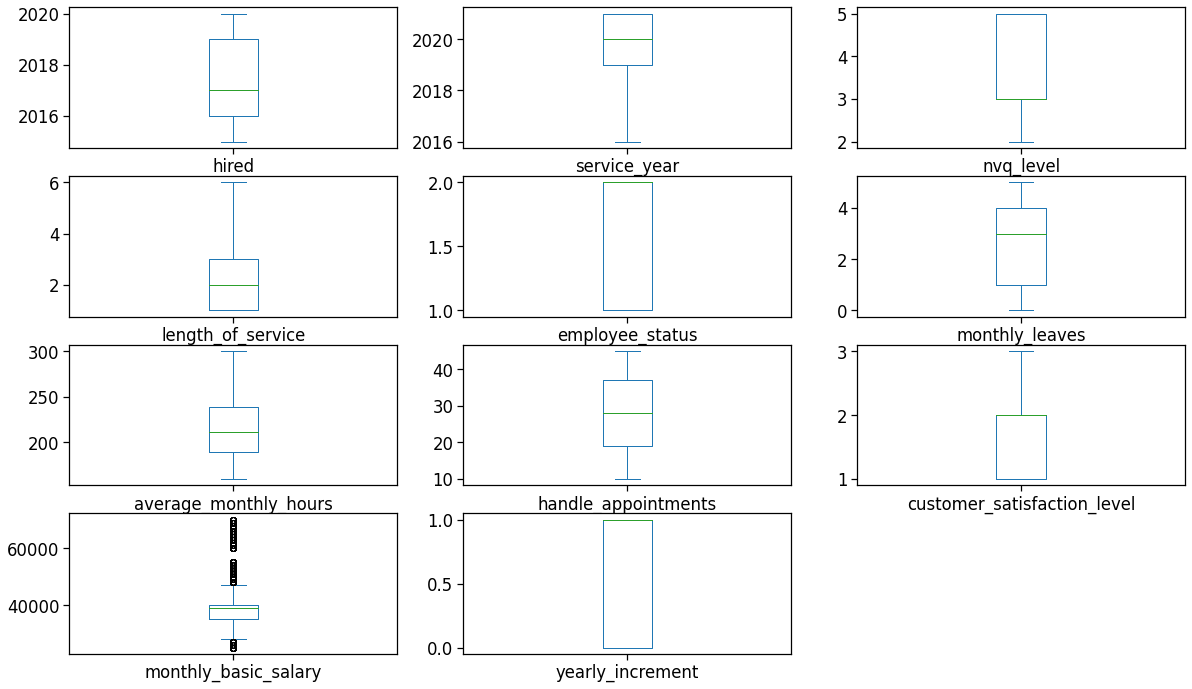

In [ ]:
# box and whiskers plot
sns.set_context('notebook',font_scale = 1.5)
emp_data.plot(kind='box', subplots=True, layout=(5,3), figsize=(20,15))
plt.show()

In [ ]:
emp_data['hired'].value_counts()

2018    785
2017    780
2016    736
2015    727
2019    717
2020    715
Name: hired, dtype: int64

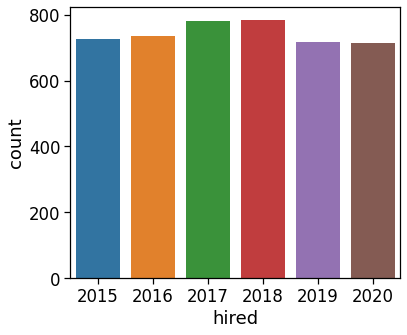

In [ ]:
plt.figure(figsize=(6,5))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=emp_data.hired.value_counts()[:10].index,y=emp_data.hired.value_counts()[:10].values)
sns.countplot(emp_data['hired'])
plt.tight_layout()

In [ ]:
emp_data['employee_status'].value_counts()

2    2576
1    1884
Name: employee_status, dtype: int64

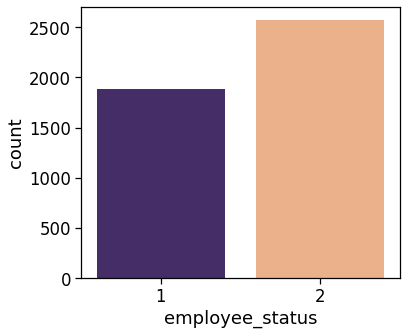

In [ ]:
plt.figure(figsize=(6,5))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=emp_data.employee_status.value_counts()[:10].index,y=emp_data.employee_status.value_counts()[:10].values)
sns.countplot(emp_data['employee_status'], palette=['#432371',"#FAAE7B"])
plt.tight_layout()

In [ ]:
Trainee = emp_data[(emp_data.employee_status==1)]
Permanent = emp_data[(emp_data.employee_status==2)]


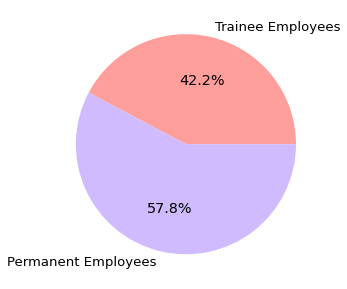

In [ ]:
colors = sns.color_palette('pastel')[3:5]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Trainee),len(Permanent)],labels=['Trainee Employees','Permanent Employees'],colors=colors, autopct='%.1f%%')
plt.tight_layout()

In [ ]:
emp_data['nvq_level'].value_counts()

5    1135
3    1131
2    1101
4    1093
Name: nvq_level, dtype: int64

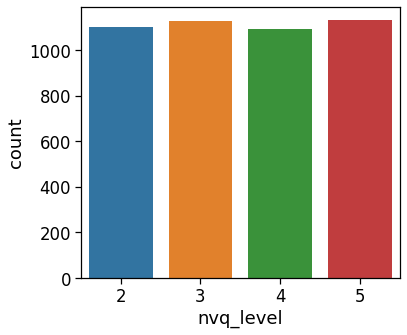

In [ ]:
## nvq_level

plt.figure(figsize=(6,5))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=emp_data.nvq_level.value_counts()[:10].index,y=emp_data.nvq_level.value_counts()[:10].values)
sns.countplot(emp_data['nvq_level'])
plt.tight_layout()

In [ ]:
emp_data['length_of_service'].value_counts()

1    1884
2    1107
3     695
4     368
5     281
6     125
Name: length_of_service, dtype: int64

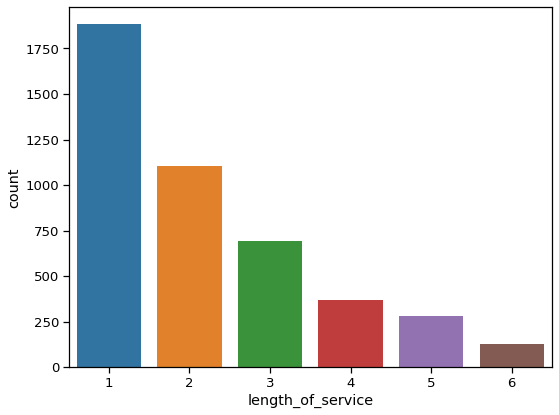

In [ ]:
# length_of_service
plt.figure(figsize=(8,6))
sns.set_context('notebook',font_scale = 1.2)
sns.countplot(emp_data['length_of_service'])
plt.tight_layout()

In [ ]:
emp_data['monthly_leaves'].value_counts()

3    763
1    763
5    760
4    746
0    734
2    694
Name: monthly_leaves, dtype: int64

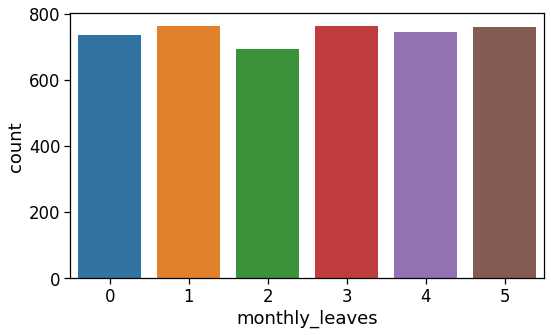

In [ ]:
#monthly_leaves

plt.figure(figsize=(8,5))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(emp_data['monthly_leaves'])
plt.tight_layout()

In [ ]:
emp_data['customer_satisfaction_level'].value_counts()

1    2013
2    1452
3     995
Name: customer_satisfaction_level, dtype: int64

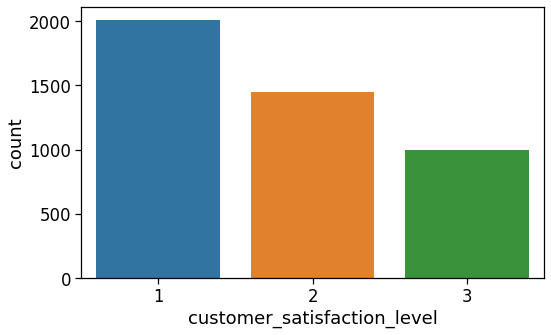

In [ ]:
plt.figure(figsize=(8,5))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(emp_data['customer_satisfaction_level'])
plt.tight_layout()

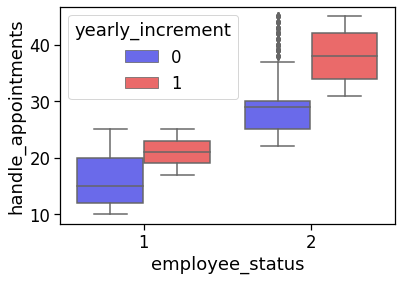

In [ ]:
sns.boxplot(x='employee_status', y='handle_appointments', hue='yearly_increment', palette='seismic', data=emp_data)

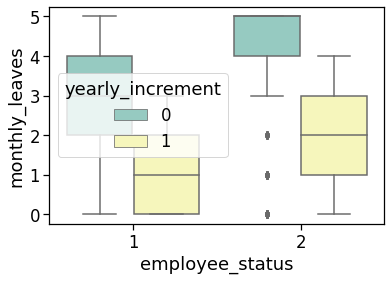

In [ ]:
sns.boxplot(x='employee_status', y='monthly_leaves', hue='yearly_increment', data=emp_data,  palette="Set3", fliersize=5,dodge=True)

In [ ]:
avg_leaves = pd.crosstab(emp_data['monthly_leaves'], emp_data['yearly_increment'])
avg_leaves

yearly_increment,0,1
monthly_leaves,,
0,191,543
1,197,566
2,180,514
3,298,465
4,552,194
5,760,0


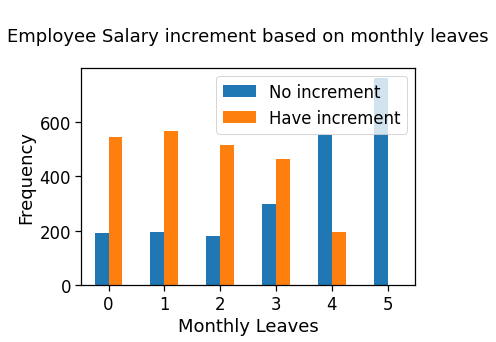

In [ ]:
pd.crosstab(emp_data.monthly_leaves,emp_data.yearly_increment).plot(kind="bar")
plt.title('\nEmployee Salary increment based on monthly leaves\n')
plt.xlabel('Monthly Leaves')
plt.xticks(rotation=0)
plt.legend(["No increment", "Have increment"])
plt.ylabel('Frequency')
plt.show()

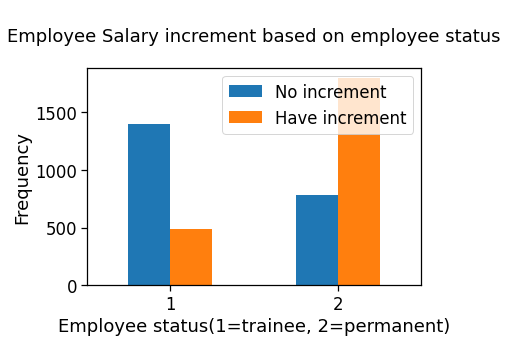

In [ ]:
pd.crosstab(emp_data.employee_status,emp_data.yearly_increment).plot(kind="bar")
plt.title('\nEmployee Salary increment based on employee status\n')
plt.xlabel('Employee status(1=trainee, 2=permanent)')
plt.xticks(rotation=0)
plt.legend(["No increment", "Have increment"])
plt.ylabel('Frequency')
plt.show()

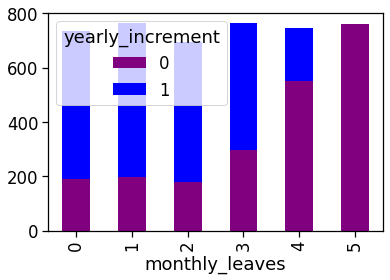

In [ ]:
avg_leaves.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)


In [ ]:
VerySatisfied = emp_data[(emp_data.customer_satisfaction_level==1)]
Satisfied = emp_data[(emp_data.customer_satisfaction_level==2)]
SlightlySatisfied = emp_data[(emp_data.customer_satisfaction_level==3)]

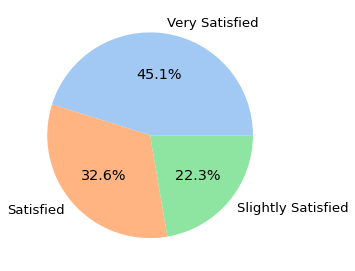

In [ ]:
colors = sns.color_palette('pastel')[0:3]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(VerySatisfied),len(Satisfied),len(SlightlySatisfied)],labels=['Very Satisfied','Satisfied','Slightly Satisfied'],colors=colors, autopct='%.1f%%')
plt.tight_layout()




## Feature Selection


In [12]:
from sklearn.ensemble import ExtraTreesClassifier

[0.014028   0.01068161 0.01657302 0.02322354 0.0688319  0.19089453
 0.22866276 0.32678174 0.05282416 0.06749873]


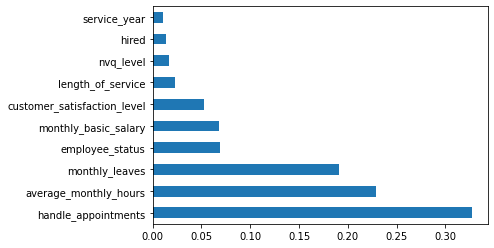

In [17]:
#Feature selection
X = emp_data.drop(['yearly_increment'],axis=1)
X = X.select_dtypes(exclude=[object])
Y = emp_data['yearly_increment'].values

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##### From above variable selection, dropping 'hired','nvq_level','employee_status', 'service_year', 'monthly_basic_salary','length_of_service'
##### Splitting the data

In [ ]:
X = emp_data.drop(['hired', 'service_year', 'nvq_level', 'length_of_service', 'employee_status','customer_satisfaction_level', 'monthly_basic_salary', 'yearly_increment'], axis=1).values
y = emp_data['yearly_increment'].values

In [ ]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(4460, 3) (3568, 3) (892, 3)


#### Check the balance of target variable

In [ ]:
from collections import Counter

In [ ]:
print(Counter(y))
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2282, 0: 2178})
Counter({1: 1825, 0: 1743})
Counter({1: 457, 0: 435})


## Fitting Models


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


### Logistic Regression


In [ ]:
lrc = LogisticRegression()
lrc.fit(X_train, y_train)
y_pred_lrc = lrc.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred_lrc))

Accuracy score: 0.8565022421524664


In [ ]:
lrc_cm = confusion_matrix(y_test, y_pred_lrc)
print(lrc_cm)

[[368  67]
 [ 61 396]]


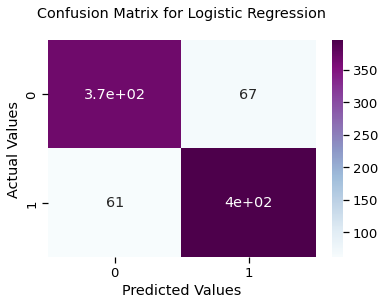

In [ ]:
sns.heatmap(lrc_cm, annot=True,cmap='BuPu', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix for Logistic Regression\n')
plt.show()

#### Hyperparameter tuning for Logistic Regression




In [ ]:
# Parameters

param_dist = {'C': [0.01, 0.1, 0, 1, 2, 3, 10, 100],
              'penalty': ['l1', 'l2']
              }


In [ ]:
lr_hyper = RandomizedSearchCV(lrc, param_distributions=param_dist, cv=5, verbose=2, random_state=42, n_iter=10, scoring='accuracy', n_jobs=-1)

lr_hyper.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 0, 1, 2, 3, 10, 100],
                                        'penalty': ['l1', 'l2']},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
lr_hyper.best_params_


{'C': 0.01, 'penalty': 'l2'}

In [ ]:
lr_hyper.best_score_

0.8761107247948268

In [ ]:
lr_classifier=LogisticRegression(C= 0.01, penalty= 'l2')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)

In [ ]:
lr_cm = confusion_matrix(y_test, y_pred_lr)
print(lr_cm)

[[369  66]
 [ 57 400]]


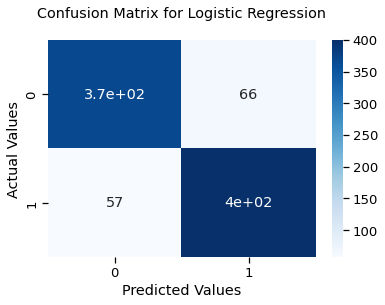

In [ ]:
sns.heatmap(lr_cm, annot=True,cmap='Blues', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix for Logistic Regression\n')
plt.show()

In [ ]:
print('Accuracy score:', accuracy_score(y_test, y_pred_lr))
print('\nPercision: ', precision_score(y_test, y_pred_lr))
print('\nRecall:', recall_score(y_test, y_pred_lr))
print('\nF1 score:', f1_score(y_test, y_pred_lr))

Accuracy score: 0.8621076233183856

Percision:  0.8583690987124464

Recall: 0.87527352297593

F1 score: 0.866738894907909


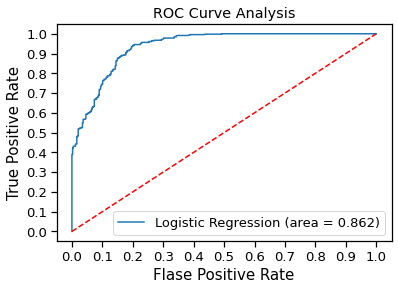

In [ ]:
lr_roc_auc = roc_auc_score(y_test, lr_classifier.predict(X_test))
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr_classifier.predict_proba(X_test)[:,1])


plt.figure()
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.3f)' % lr_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis')
plt.legend(prop={'size':13},loc="lower right")
plt.savefig('ROC')
plt.show()

### Random Forest


In [ ]:

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rforest_pred = rfc.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, rforest_pred))


Accuracy score: 0.9618834080717489


In [ ]:
rfc_cm = confusion_matrix(y_test, rforest_pred)
print(rfc_cm)

[[409  26]
 [  8 449]]


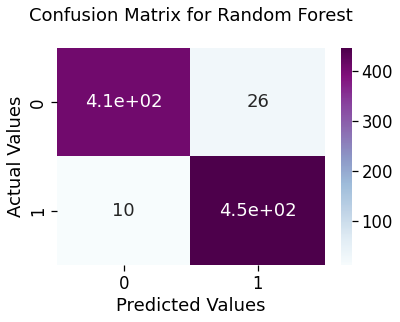

In [ ]:
sns.heatmap(rfc_cm, annot=True,cmap='BuPu', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix for Random Forest\n')
plt.savefig('random_forest')
plt.show()


#### Hyperparameter tuning for Random Forest





In [ ]:
n_estimator = [int(x) for (x) in np.linspace(100, 1200, num=12)]
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
criterion = ['gini', 'entropy']

In [ ]:
param_dist = {
    "n_estimators" : n_estimator,
    "max_depth" : max_depth,
    "min_samples_leaf":min_samples_leaf,
    "criterion":criterion,
    "min_samples_split":min_samples_split 
}

In [ ]:
rf_hyper = RandomizedSearchCV(rfc, param_distributions=param_dist, verbose=2, cv=5, random_state=42, n_iter=10, scoring='accuracy')

rf_hyper.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.3s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
rf_hyper.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 900}

In [ ]:
rf_hyper.best_score_

0.9736517889063059

In [ ]:
rf_hyper.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=900)

In [ ]:
rf_classifier = RandomForestClassifier(criterion= 'gini', max_depth=20, min_samples_leaf= 5, min_samples_split= 5, n_estimators= 900)
rf_classifier.fit(X_train, y_train)
y_rf_pred = rf_classifier.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_rf_pred))



Accuracy score: 0.9641255605381166


In [ ]:
rforest_cm = confusion_matrix(y_test, y_rf_pred)
print(rforest_cm)

[[403  32]
 [  0 457]]


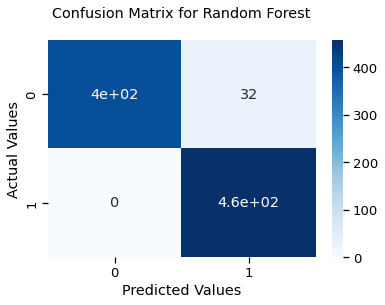

In [ ]:
sns.heatmap(rforest_cm, annot=True,cmap='Blues', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix for Random Forest\n')
plt.savefig('random_forest')
plt.show()

In [ ]:
print('Accuracy score:', accuracy_score(y_test, y_rf_pred))
print('\nPercision: ', precision_score(y_test, y_rf_pred))
print('\nRecall:', recall_score(y_test, y_rf_pred))
print('\nF1 score:', f1_score(y_test, y_rf_pred))

Accuracy score: 0.9641255605381166

Percision:  0.934560327198364

Recall: 1.0

F1 score: 0.9661733615221987


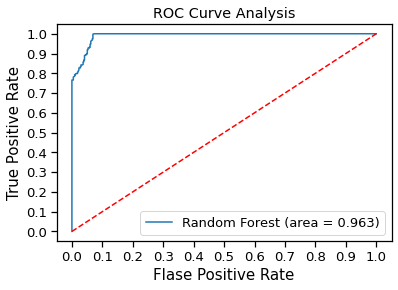

In [ ]:
rf_roc_auc = roc_auc_score(y_test, rf_classifier.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.3f)' % rf_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis')
plt.legend(prop={'size':13},loc="lower right")
plt.savefig('ROC')
plt.show()

### Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)  
naive_pred = nb.predict(X_test)
print(accuracy_score(y_test, naive_pred))


0.8396860986547086


In [ ]:
nb_cm = confusion_matrix(y_test, naive_pred)
print(nb_cm)

[[379  56]
 [ 87 370]]


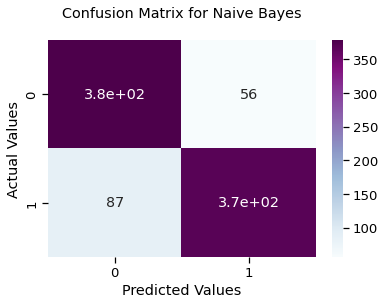

In [ ]:
sns.heatmap(nb_cm, annot=True,cmap='BuPu', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix for Naive Bayes\n')
plt.savefig('naive_bayes')
plt.show()

#### Hyperparameter tuning for Naive Bayes

In [ ]:
params_nb = {
    'var_smoothing': np.logspace(0,-5, num=100)
}

In [ ]:
nb_hyper = RandomizedSearchCV(estimator=nb, param_distributions=params_nb, verbose=2, cv=5, random_state=42, n_iter=10, scoring='accuracy', n_jobs=-1)
nb_hyper.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.90215085e-01, 7.92482898e-01, 7.05480231e-01,
       6.28029144e-01, 5.59081018e-01, 4.97702356e-01, 4.43062146e-01,
       3.94420606e-01, 3.51119173e-01, 3.12571585e-01, 2.78255940e-01,
       2.47707636e-01, 2.20513074e-01, 1.96304065e-01, 1.74752840e-01,
       1.5556761...
       1.45082878e-04, 1.29154967e-04, 1.14975700e-04, 1.02353102e-04,
       9.11162756e-05, 8.11130831e-05, 7.22080902e-05, 6.42807312e-05,
       5.72236766e-05, 5.09413801e-05, 4.53487851e-05, 4.03701726e-05,
       3.59381366e-05, 3.19926714e-05, 2.84803587e-05, 2.53536449e-05,
       2.25701972e-05, 2.00923300e-05, 1.78864953e-05, 1.59228279e-05,
       1.41747416e-05, 1.26185688e-05, 1.12332403e-05, 1.00000000e-05])},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
nb_hyper.best_params_

{'var_smoothing': 6.428073117284319e-05}

In [ ]:
nb_hyper.best_score_

0.8444423491696819

In [ ]:
# Naive Bayes
naive_bayes = GaussianNB(var_smoothing= 6.428073117284319e-05)
naive_bayes.fit(X_train, y_train)  
y_naive_pred = naive_bayes.predict(X_test)

In [ ]:
nbayes_cm = confusion_matrix(y_test, y_naive_pred)
print(nbayes_cm)

[[379  56]
 [ 86 371]]


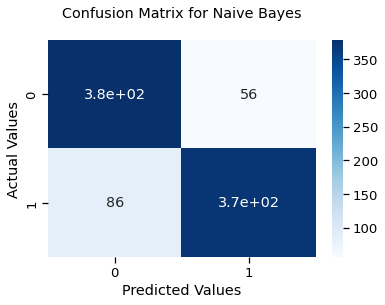

In [ ]:
sns.heatmap(nbayes_cm, annot=True,cmap='Blues', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix for Naive Bayes\n')
plt.savefig('naive_bayes')
plt.show()

In [ ]:
print('Accuracy score:', accuracy_score(y_test, y_naive_pred))
print('\nPercision: ', precision_score(y_test, y_naive_pred))
print('\nRecall:', recall_score(y_test, y_naive_pred))
print('\nF1 score:', f1_score(y_test, y_naive_pred))

Accuracy score: 0.8408071748878924

Percision:  0.8688524590163934

Recall: 0.811816192560175

F1 score: 0.839366515837104


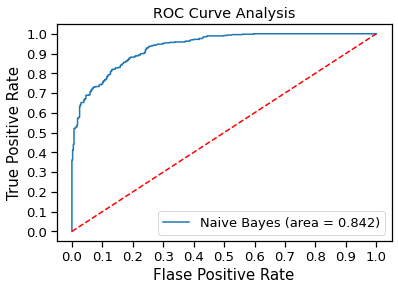

In [ ]:
naive_roc_auc = roc_auc_score(y_test, naive_bayes.predict(X_test))
naive_fpr, naive_tpr, naive_thresholds = roc_curve(y_test, naive_bayes.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(naive_fpr, naive_tpr, label='Naive Bayes (area = %0.3f)' % naive_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis')
plt.legend(prop={'size':13},loc="lower right")
plt.savefig('ROC')
plt.show()


### Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dt = dtc.predict(X_test)
print(accuracy_score(y_test, pred_dt))


0.9506726457399103


In [ ]:
dtc_cm = confusion_matrix(y_test, pred_dt)
print(dtc_cm)

[[412  23]
 [ 21 436]]


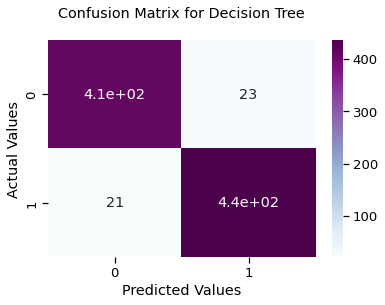

In [ ]:
sns.heatmap(dtc_cm, annot=True,cmap='BuPu', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix for Decision Tree\n')
plt.show()

#### Hypereparameter tuning for Decision Tree

In [ ]:
max_features= np.arange(1,9)
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
criterion = ['gini', 'entropy']

In [ ]:
param_dist = {
              "max_features": max_features,
              "max_depth": max_depth,
              "min_samples_leaf": min_samples_leaf,
              "min_samples_split": min_samples_split,
              "criterion": criterion
              }


In [ ]:

dt_hyper=RandomizedSearchCV(dtc, param_distributions=param_dist, verbose=2, cv=5, random_state=42, n_iter=10, scoring='accuracy', n_jobs=-1)
dt_hyper.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': array([1, 2, 3, 4, 5, 6, 7, 8]),
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
dt_hyper.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 2,
 'min_samples_leaf': 10,
 'min_samples_split': 15}

In [ ]:
dt_hyper.best_score_

0.9714108925477625

In [ ]:
dt_hyper.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features=2,
                       min_samples_leaf=10, min_samples_split=15)

In [ ]:

dt_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth= 25, max_features= 2, min_samples_leaf= 10, min_samples_split= 15)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)


In [ ]:
dt_cm = confusion_matrix(y_test, y_pred_dt)
print(dt_cm)


[[403  32]
 [  2 455]]


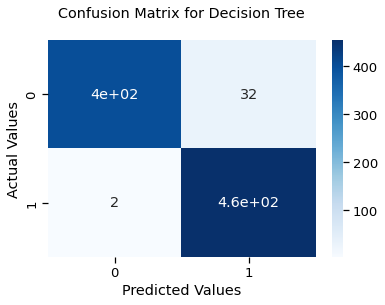

In [ ]:
sns.heatmap(dt_cm, annot=True,cmap='Blues', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix for Decision Tree\n')
plt.show()

In [ ]:
print('Accuracy score:', accuracy_score(y_test, y_pred_dt))
print('\nPercision: ', precision_score(y_test, y_pred_dt))
print('\nRecall:', recall_score(y_test, y_pred_dt))
print('\nF1 score:', f1_score(y_test, y_pred_dt))

Accuracy score: 0.9618834080717489

Percision:  0.9342915811088296

Recall: 0.9956236323851203

F1 score: 0.9639830508474576


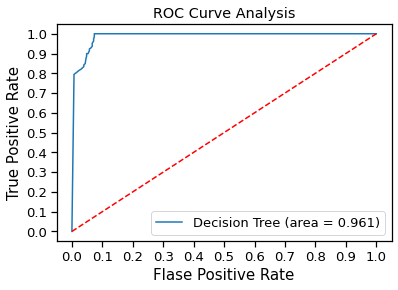

In [ ]:
dt_roc_auc = roc_auc_score(y_test, dt_classifier.predict(X_test))
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.3f)' % dt_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis')
plt.legend(prop={'size':13},loc="lower right")
plt.savefig('ROC')
plt.show()

### Support Vector Machine

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(accuracy_score(y_test, pred_svc))

0.8183856502242153


In [ ]:
svc_cm1 = confusion_matrix(y_test, pred_svc)
print(svc_cm1)

[[379  56]
 [106 351]]


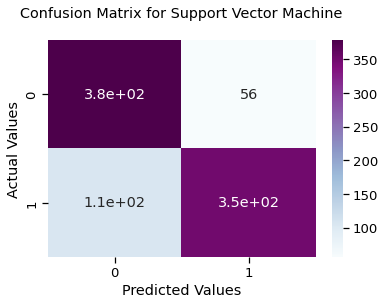

In [ ]:
sns.heatmap(svc_cm1, annot=True,cmap='BuPu', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix for Support Vector Machine\n')
plt.show()

#### Hyperparameter tuning for SVM

In [ ]:
param_dist = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [ ]:
svc_hyper = RandomizedSearchCV(svc, param_distributions=param_dist, verbose=2, cv=5, random_state=42, n_iter=10, scoring='accuracy', n_jobs=-1)
svc_hyper.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
svc_hyper.best_params_ 

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
svc_hyper.best_score_

0.9711303876389265

In [ ]:
svc_hyper.best_estimator_

SVC(C=1000, gamma=0.01)

In [ ]:
#Svm model
svc_classifier = SVC(C=1000, gamma=0.01, kernel='rbf')
svc_classifier.fit(X_train, y_train)
y_pred_svc= svc_classifier.predict(X_test)


In [ ]:
svc_cm = confusion_matrix(y_test, y_pred_svc)
print(svc_cm)


[[404  31]
 [  0 457]]


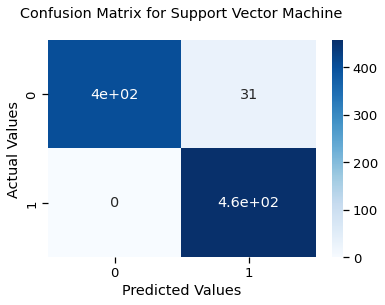

In [ ]:
sns.heatmap(svc_cm, annot=True,cmap='Blues', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix for Support Vector Machine\n')
plt.show()

In [ ]:
print('Accuracy score:', accuracy_score(y_test, y_pred_svc))
print('\nPercision: ', precision_score(y_test, y_pred_svc))
print('\nRecall:', recall_score(y_test, y_pred_svc))
print('\nF1 score:', f1_score(y_test, y_pred_svc))

Accuracy score: 0.9652466367713004

Percision:  0.9364754098360656

Recall: 1.0

F1 score: 0.9671957671957672


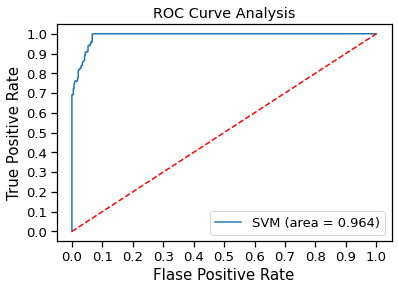

In [ ]:
svcClassifier=SVC(C=1000, gamma=0.01, kernel='rbf', probability=True)
svcClassifier.fit(X_train, y_train)


svc_roc_auc = roc_auc_score(y_test, svcClassifier.predict(X_test))
svc_fpr, svc_tpr, thresholds = roc_curve(y_test, svcClassifier.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(svc_fpr, svc_tpr, label='SVM (area = %0.3f)' % svc_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis')
plt.legend(prop={'size':13},loc="lower right")
plt.savefig('ROC')
plt.show()

###  K–Nearest Neighbor Classifier

In [ ]:

knn_clf = KNeighborsClassifier(n_neighbors= 5)
knn_clf.fit(X_train, y_train)
pred_knn = knn_clf.predict(X_test)
accuracy_knn=accuracy_score(y_test, pred_knn)
print(accuracy_knn)


0.9585201793721974


In [ ]:
knn_cm1 = confusion_matrix(y_test, pred_knn)
print(knn_cm1)


[[404  31]
 [  6 451]]


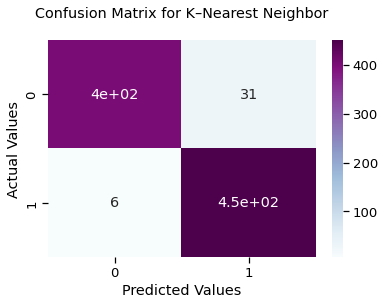

In [ ]:
sns.heatmap(knn_cm1, annot=True,cmap='BuPu', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix for K–Nearest Neighbor\n')
plt.show()

#### Hyperparameter tuning for K–Nearest Neighbor Classifier

In [ ]:
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 100, num = 50)]   
weights = ['uniform','distance']
metric = ['euclidean','manhattan','chebyshev','seuclidean','minkowski'] 

params_dist = {
    'n_neighbors': n_neighbors,
    'weights': weights,
    'metric': metric,
}

In [ ]:
knn_hyper= RandomizedSearchCV(knn_clf, param_distributions=params_dist, verbose=2, cv=5, random_state=42, n_iter=10, scoring='accuracy', n_jobs=-1)
knn_hyper.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'chebyshev', 'seuclidean',
                                                   'minkowski'],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19, 21, 23, 25,
                                                        27, 29, 31, 33, 35, 37,
                                                        39, 41, 43, 45, 47, 49,
                                                        51, 53, 55, 57, 59, ...],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
knn_hyper.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

In [ ]:
knn_hyper.best_score_

0.9565563111640168

In [ ]:
knn_classifier = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'uniform')
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)


In [ ]:
knn_cm = confusion_matrix(y_test, y_pred_knn)
print(knn_cm)


[[404  31]
 [  4 453]]


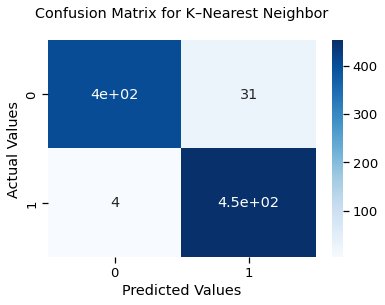

In [ ]:
sns.heatmap(knn_cm, annot=True,cmap='Blues', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix for K–Nearest Neighbor\n')
plt.show()

In [ ]:
print('Accuracy score:', accuracy_score(y_test, y_pred_knn))
print('\nPercision: ', precision_score(y_test, y_pred_knn))
print('\nRecall:', recall_score(y_test, y_pred_knn))
print('\nF1 score:', f1_score(y_test, y_pred_knn))

Accuracy score: 0.9607623318385651

Percision:  0.9359504132231405

Recall: 0.9912472647702407

F1 score: 0.9628055260361318


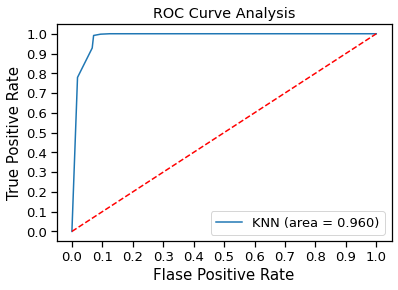

In [ ]:
knn_roc_auc = roc_auc_score(y_test, knn_classifier.predict(X_test))
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.3f)' % knn_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis')
plt.legend(prop={'size':13},loc="lower right")
plt.savefig('ROC')
plt.show()

In [ ]:
import pickle

In [ ]:
#save model
pickle.dump(svc_classifier, open('model.pkl', 'wb'))

# load model
employee_model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
#Predict the output

print(employee_model.predict([[2,280,40]]))

[1]
